In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score, GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report,f1_score,recall_score,precision_score,accuracy_score,precision_recall_curve,roc_curve,roc_auc_score

from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from collections import Counter

from scipy.stats import norm, multivariate_normal

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import warnings
warnings.filterwarnings('ignore')

import random
random.seed(0)

In [ ]:
#Loading Dataset
cc_data = pd.read_csv("creditcard.csv")

In [ ]:
cc_data.shape

(284807, 31)

In [ ]:
cc_data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [ ]:
cc_data.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

In [ ]:
#Code for checking if any feature has null values
cc_data.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [ ]:
#Counts for each class in the dataset. As you can see, we have only 492 (0.17%) fraud cases out of 284807 records. Remaining 284315 (99.8%) of the records belong to genuine cases.
cc_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
def data_preparation(data):
    features = data.iloc[:,0:-1]
    label = data.iloc[:,-1]
    x_train,x_test,y_train,y_test = train_test_split(features,label,test_size=0.2,random_state=0)

    #Standarad scaler is not applied since all the features are outcomes of PCA and are already normalized.
    #sc = StandardScaler()
    #x_train = sc.fit_transform(x_train)
    #x_test = sc.transform(x_test)

    print("Length of training data",len(x_train))
    print("Length of test data",len(x_test))
    return x_train,x_test,y_train,y_test

The function trains the model on the training data and then evaluates the performance of the model on the training data, cross-validation data, and testing data. Specifically, it calculates F1, precision, and recall scores for each of the three datasets. It also generates three confusion matrices, one for each dataset, and normalizes them based on the number of samples in each class.

In [ ]:
def build_model_train_test(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)

    y_pred = model.predict(x_train)

    print("\n   Accuracy Scores on Train data ")
    #print("Clasification Report")
    #print(classification_report(y_train,y_pred))

    print("F1 Score: ", f1_score(y_train,y_pred))
    print("Precision Score: ", precision_score(y_train,y_pred))
    print("Recall Score: ", recall_score(y_train,y_pred))

    print("\n   Accuracy Scores on Cross validation data ")
    y_pred_cv = cross_val_predict(model,x_train,y_train,cv=5)
    print("F1 Score: ", f1_score(y_train,y_pred_cv))
    print("Precision Score: ", precision_score(y_train,y_pred_cv))
    print("Recall Score: ", recall_score(y_train,y_pred_cv))


    print("\n   Accuracy Scores on Test data ")
    y_pred_test = model.predict(x_test)

    #print("Clasification Report")
    #print(classification_report(y_test,y_pred_test))

    print("F1 Score: ", f1_score(y_test,y_pred_test))
    print("Precision Score: ", precision_score(y_test,y_pred_test))
    print("Recall Score: ", recall_score(y_test,y_pred_test))

    #Confusion Matrix
    plt.figure(figsize=(18,6))
    gs = gridspec.GridSpec(1,2)

    ax1 = plt.subplot(gs[0])
    cnf_matrix = confusion_matrix(y_train,y_pred)
    row_sum = cnf_matrix.sum(axis=1,keepdims=True)
    cnf_matrix_norm =cnf_matrix / row_sum
    sns.heatmap(cnf_matrix_norm,cmap='YlGnBu',annot=True)
    plt.title("Normalized Confusion Matrix - Train Data")

#     ax2 = plt.subplot(gs[1])
#     cnf_matrix = confusion_matrix(y_train,y_pred_cv)
#     sns.heatmap(cnf_matrix,cmap='YlGnBu',annot=True,fmt='d')
#     plt.title("Confusion Matrix - CV Data")

    ax3 = plt.subplot(gs[1])
    cnf_matrix = confusion_matrix(y_test,y_pred_test)
    row_sum = cnf_matrix.sum(axis=1,keepdims=True)
    cnf_matrix_norm =cnf_matrix / row_sum
    sns.heatmap(cnf_matrix_norm,cmap='YlGnBu',annot=True)
    plt.title("Normalized Confusion Matrix - Test Data")

In [ ]:
def build_model_train(model,x_train,y_train):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_train)

    #print("Clasification Report")
    #print(classification_report(y_train,y_pred))

    print("\n   Accuracy Scores on Train data ")
    print("F1 Score: ", f1_score(y_train,y_pred))
    print("Precision Score: ", precision_score(y_train,y_pred))
    print("Recall Score: ", recall_score(y_train,y_pred))

    print("\n   Accuracy Scores on Cross validation data ")
    y_pred_cv = cross_val_predict(model,x_train,y_train,cv=5)
    print("F1 Score: ", f1_score(y_train,y_pred_cv))
    print("Precision Score: ", precision_score(y_train,y_pred_cv))
    print("Recall Score: ", recall_score(y_train,y_pred_cv))

    cnf_matrix = confusion_matrix(y_train,y_pred)
    row_sum = cnf_matrix.sum(axis=1,keepdims=True)
    cnf_matrix_norm =cnf_matrix / row_sum
    sns.heatmap(cnf_matrix_norm,cmap='YlGnOr',annot=True)
    plt.title("Normalized Confusion Matrix - Train data")

In [ ]:
def build_model_test(model,x_test,y_test):

    y_pred_test = model.predict(x_test)
    #print("Clasification Report - Test Data")
    #print(classification_report(y_test,y_pred_test))

    print("F1 Score: ", f1_score(y_test,y_pred_test))
    print("Precision Score: ", precision_score(y_test,y_pred_test))
    print("Recall Score: ", recall_score(y_test,y_pred_test))

    cnf_matrix = confusion_matrix(y_test,y_pred_test)
    row_sum = cnf_matrix.sum(axis=1,keepdims=True)
    cnf_matrix_norm =cnf_matrix / row_sum
    sns.heatmap(cnf_matrix_norm,cmap='YlGnBu',annot=True)
    plt.title("Normalized Confusion Matrix - Test data")

This function SelectThresholdByCV is used to find the best threshold value to use for a binary classification problem based on the probability scores and actual labels.

It takes two inputs: probs, which are the predicted probability scores of the model, and y, which are the actual labels. The function then iterates through a range of possible threshold values (in increments of 0.001), and for each threshold value it computes the precision, recall, and F1 score using the predicted labels based on that threshold value.

The function keeps track of the best F1 score, as well as the corresponding precision, recall, and threshold values. It also plots the precision-recall trade-off for all threshold values. The best threshold value and associated metrics are printed at the end of the function.

In [ ]:
def SelectThresholdByCV(probs,y):
    best_threshold = 0
    best_f1 = 0
    f = 0
    precision =0
    recall=0
    best_recall = 0
    best_precision = 0
    precisions=[]
    recalls=[]

    thresholds = np.arange(0.0,1.0,0.001)
    for threshold in thresholds:
        predictions = (probs > threshold)
        f = f1_score(y, predictions)
        precision = precision_score(y, predictions)
        recall = recall_score(y, predictions)
        #print("Threshold {0},Precision {1},Recall {2}".format(threshold,precision,recall))

        if f > best_f1:
            best_f1 = f
            best_precision = precision
            best_recall = recall
            best_threshold = threshold

        precisions.append(precision)
        recalls.append(recall)

    #Precision-Recall Trade-off
    plt.plot(thresholds,precisions,label='Precision')
    plt.plot(thresholds,recalls,label='Recall')
    plt.xlabel("Threshold")
    plt.title('Precision Recall Trade Off')
    plt.legend()
    plt.show()

    print ('Best F1 Score %f' %best_f1)
    print ('Best Precision Score %f' %best_precision)
    print ('Best Recall Score %f' %best_recall)
    print ('Best Epsilon Score', best_threshold)

This is a Python function that takes in two arguments, probs and y. The probs argument is a numpy array of predicted probabilities for a set of data points, and y is a numpy array of the true labels for those data points.


This function is used in anomaly detection problems, where the goal is to identify data points that are significantly different from the rest of the data. The predicted probabilities are usually obtained from a machine learning model, and a threshold is selected to identify anomalies based on these probabilities.

In [ ]:
def SelectThresholdByCV_Anomaly(probs,y):
    best_epsilon = 0
    best_f1 = 0
    f = 0
    precision =0
    recall=0
    best_recall = 0
    best_precision = 0

    epsilons = sorted(np.unique(probs))
    #print(epsilons)

    precisions=[]
    recalls=[]
    for epsilon in epsilons:
        predictions = (probs < epsilon)
        f = f1_score(y, predictions)
        precision = precision_score(y, predictions)
        recall = recall_score(y, predictions)
        #print("Theshold {0},Precision {1},Recall {2}".format(epsilon,precision,recall))

        if f > best_f1:
            best_f1 = f
            best_precision = precision
            best_recall = recall
            best_epsilon = epsilon

        precisions.append(precision)
        recalls.append(recall)

    #Precision-Recall Trade-off
    plt.plot(epsilons,precisions,label='Precision')
    plt.plot(epsilons,recalls,label='Recall')
    plt.xlabel("Epsilon")
    plt.title('Precision Recall Trade Off')
    plt.legend()
    plt.show()

    print ('Best F1 Score %f' %best_f1)
    print ('Best Precision Score %f' %best_precision)
    print ('Best Recall Score %f' %best_recall)
    print ('Best Epsilon Score', best_epsilon)

In [ ]:
def Print_Accuracy_Scores(y,y_pred):
    print("F1 Score: ", f1_score(y,y_pred))
    print("Precision Score: ", precision_score(y,y_pred))
    print("Recall Score: ", recall_score(y,y_pred))

This code performs data visualization for a dataset called "cc_data" using the Matplotlib and Seaborn libraries in Python. Specifically, it plots the distribution of each feature for Genuine (Class 0) and Fraud (Class 1) cases in the dataset. It does so by creating a figure object, a grid of subplots, and then iterating over each feature and plotting two histograms (one for each class) on each subplot. Finally, it displays the final figure object.

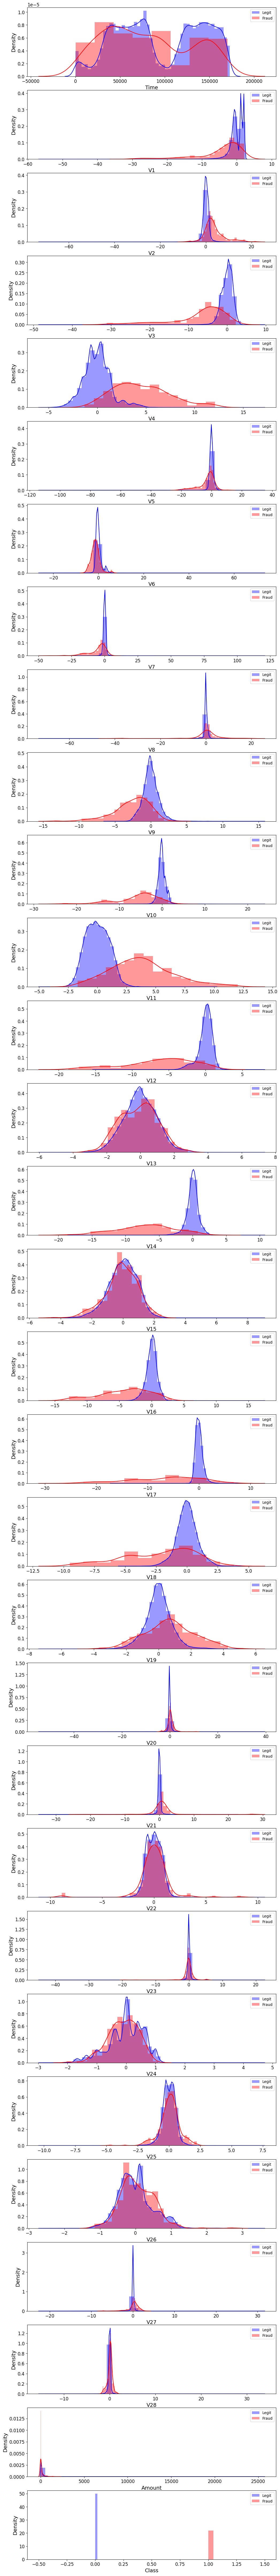

In [ ]:
#Data Visualization for checking the distribution for Genuine cases & Fraud cases for each feature
v_features = cc_data.columns
plt.figure(figsize=(12,31*4))
gs = gridspec.GridSpec(31,1)

for i, col in enumerate(v_features):
    ax = plt.subplot(gs[i])
    sns.distplot(cc_data[col][cc_data['Class']==0],color='b',label='Legit')
    sns.distplot(cc_data[col][cc_data['Class']==1],color='r',label='Fraud')
    ax.legend()
plt.show()

In [ ]:
#Splitting the input features and target label into different arrays
X = cc_data.iloc[:,0:-1]
Y = cc_data.iloc[:,-1]
X.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

The training dataset will contain 80% of the original data and will be used to fit the model. The testing dataset will contain the remaining 20% of the data and will be used to evaluate the performance of the model on unseen data.

In [ ]:
#Train Test split - By default train_test_split does STRATIFIED split based on label (y-value).
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

This ensures that the scaling is consistent between the two sets and prevents any information leakage from the test set to the training set. In this case, sc.fit_transform(x_train) fits the scaler on the training set and transforms it, while sc.transform(x_test) only applies the transformation using the scaling parameters learned from the training set.

In [ ]:
#Feature Scaling - Standardizing the scales for all x variables
#PN: We should apply fit_transform() method on train set & only transform() method on test set
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Approach 1 - Adhoc Approach
In this approach, we applied mutiple models on the data, did error analysis & tried to improve model performance.

Step1 - SGDClassifier model

Step2 - Ensemble Models

Step1 - SGDClassifier

In [ ]:
#Build a basic SGDClassifier model
sgd_cls = SGDClassifier(class_weight='balanced', random_state=0)
sgd_cls.fit(x_train,y_train)

SGDClassifier(class_weight='balanced', random_state=0)

In [ ]:
#Predict target variable (Y-label)
y_pred = sgd_cls.predict(x_train)

Since the data set is imbalanced, we should go with f1-score for comparing models & shouldn’t use accuracy_score() & roc_auc_score() for the below reasons.

1) accuracy_score looks into how many records are predicted correctly. So in the imbalance data set, even if we predict all records as 0 (genuine class) the accuracy score will still be more than 99%.
2) roc_auc_score is the plot between TRUE POSITIVE RATE (recall/sensitivity) and FALSE POSITIVE RATE (1 - true negative rate). Since it focuses on both positives and negatives equally, it works well for the balanced datasets and doesn’t work well for imbalanced datasets.
3) F1-Score is a harmonic mean of precision and recall (harmonic mean gives more weight to low value). As a result, the classifier will give high F1-Score only if both Precision and Recall are high. F1-Score focuses more on true positive cases than true negative cases. So we should use F1-Score to compare multiple models as the positive case is rare.

For Fraud detection data, recall score is more important than precison score, since the classifier should classify all the fraud cases correctly (High Recall). However it is OK to incorrectly predict some genuine classes as fraud classes.

In [ ]:
#Classification_report provides main classification metrics(precision, recall & f1-score) for each class
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96    227454
           1       0.02      0.94      0.04       391

    accuracy                           0.92    227845
   macro avg       0.51      0.93      0.50    227845
weighted avg       1.00      0.92      0.96    227845



In [ ]:
Print_Accuracy_Scores(y_train,y_pred)

F1 Score:  0.04039512168202637
Precision Score:  0.020642978003384094
Recall Score:  0.9360613810741688


SGDClassifier is a supervised learning model. It is a linear classifier that uses stochastic gradient descent (SGD) to optimize the loss function.

From the basic SGDClassifier model we got a very good score for Recall but Precision is very low. So we need to approach GridSearchCV to tune and find best hyper-parameter values.

Note: We have commented GridSearchCV code as it is taking long time to execute. So we took only couple of hyper-parameters & build the best model


   Accuracy Scores on Train data 
F1 Score:  0.8103896103896103
Precision Score:  0.8232189973614775
Recall Score:  0.7979539641943734

   Accuracy Scores on Cross validation data 
F1 Score:  0.7919799498746867
Precision Score:  0.7764127764127764
Recall Score:  0.8081841432225064

---Accuracy Scores on Test data---
F1 Score:  0.8177339901477833
Precision Score:  0.8137254901960784
Recall Score:  0.8217821782178217


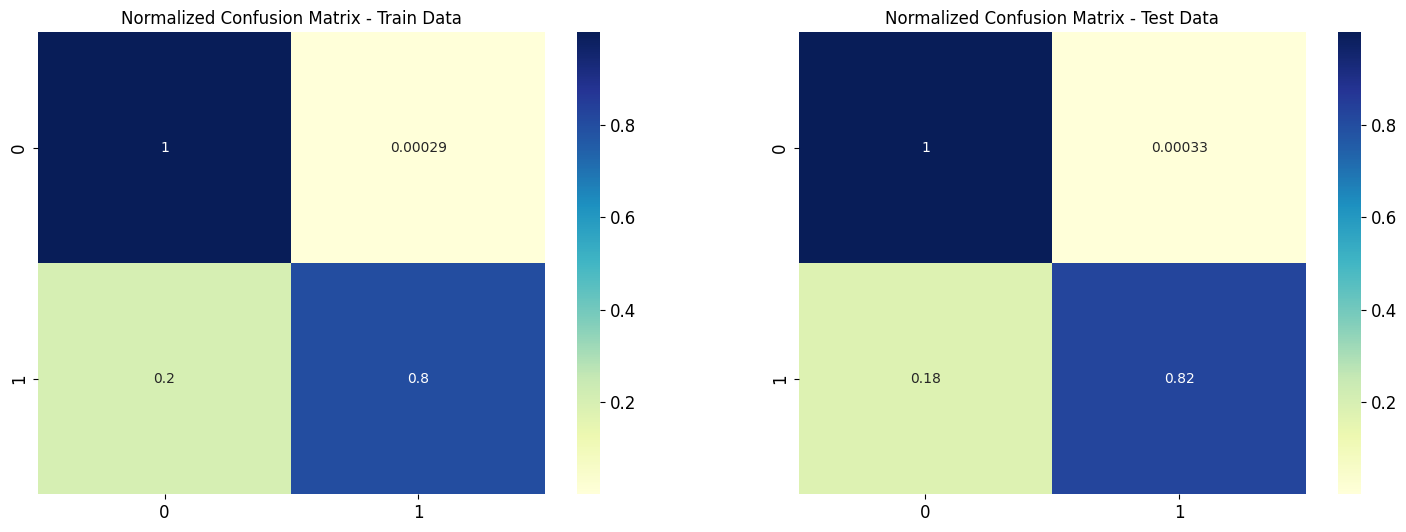

In [ ]:
#Build the best model out of GridSearchCV
best_sgd_clf = SGDClassifier(alpha=5, class_weight='balanced',random_state=0)
build_model_train_test(best_sgd_clf,x_train,x_test,y_train,y_test)

By looking at the performance measures on Test data, So we can conclude that SGDClassifier has provided good results on both train and test data sets with F1, Precision and Recall scores around 80%

Note: For fraud detection, recall score is more important than precision score.

I've used class_weight='balanced' parameter for all the models since the data is imbalanced. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as "n_samples / (n_classes * np.bincount(y))". So the model applies more weights to rare classes.

Confusion Matrix - Normalization can be interesting in case of class imbalance to have a more visual interpretation of which class is being misclassified. You can see from the above normalized confusion matrix that 20% of the Fraud records are misclassified in this model. So there is still lot of scope for improvement.

In [ ]:
featimp = pd.Series(best_sgd_clf.coef_.ravel(),index=X.columns).sort_values(ascending=False)
print(featimp)

V11       0.050017
V4        0.046330
V2        0.015080
V21       0.013250
V27       0.007747
Amount    0.005941
V28       0.005536
V20       0.004609
V19       0.004030
V25       0.000625
V26      -0.000198
V15      -0.000412
V22      -0.000850
Time     -0.003326
V5       -0.004172
V24      -0.004311
V13      -0.005866
V23      -0.006365
V8       -0.009087
V18      -0.011140
V1       -0.014373
V6       -0.018300
V9       -0.021454
V7       -0.032062
V16      -0.038847
V3       -0.047900
V17      -0.054827
V10      -0.058240
V12      -0.071340
V14      -0.108290
dtype: float64


We can see that coefficients for SGDClassifier model are almost close to zero for the features: V27,Amount,V28,V19,V20,V25,V26,V15,V22,Time,V5,V24,V13,V8

In [ ]:
#Decision scores or Confidence scores - Is a measure of distance of that sample to decision boundary hyperplane
y_pred_decision = best_sgd_clf.decision_function(x_train)

In [ ]:
#Precision recall curve - Computes precision-recall pairs for different probability thresholds
precisions, recalls, thresholds = precision_recall_curve(y_train,y_pred_decision)

Text(0.5, 1.0, 'Precision Recall Curve')

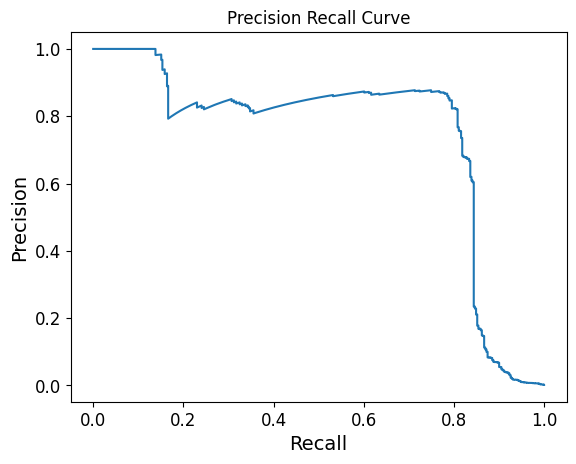

In [ ]:
plt.plot(recalls,precisions)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')

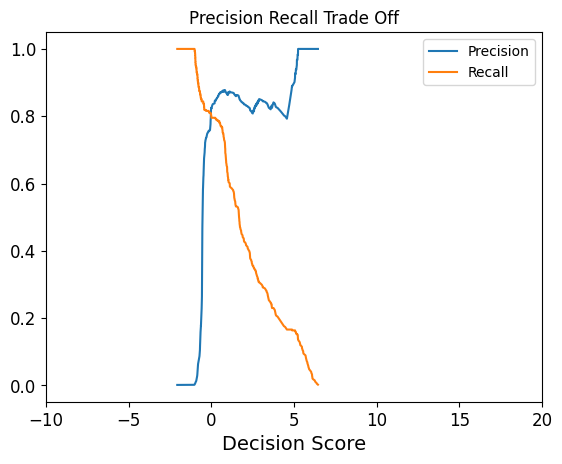

In [ ]:
#Precision-Recall Trade-off
plt.plot(thresholds,precisions[:-1],label='Precision')
plt.plot(thresholds,recalls[:-1],label='Recall')

plt.xlabel("Decision Score")
plt.title('Precision Recall Trade Off')
plt.legend()
plt.xlim([-10,20])
plt.show()

Precision Recall Trade Off also suggests that decision score of 0 provides better accuracy scores for Precision and Recall. So we can assume this is the best model from SGDClassifier.

For Demonstration purpose, I created ROC curve as well below. However ROC AUC score is not a good measure for imbalance data sets as discussed above. You can notice that the above model has given us the AUC score of 0.98, which is very high.

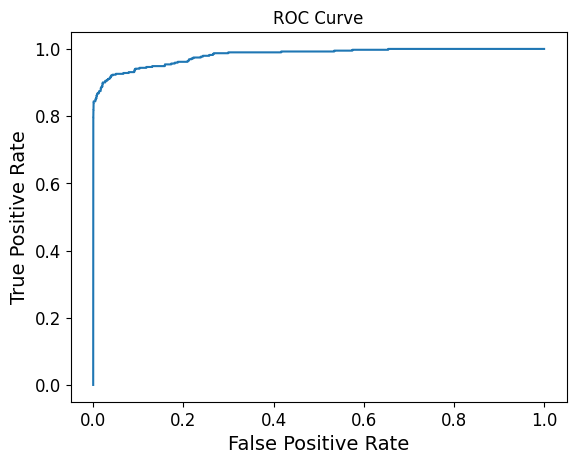

In [ ]:
fpr, tpr, thesholds = roc_curve(y_train,y_pred_decision)

plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [ ]:
roc_auc_score(y_train,y_pred_decision)

0.981467734787419

Step2 - Ensemble Models
Ensemble models may handle imbalanced datasets better due to their nature of building multiple models randomly and aggregate their predictions.


   Accuracy Scores on Train data 
F1 Score:  0.9268292682926828
Precision Score:  0.8857808857808858
Recall Score:  0.9718670076726342

   Accuracy Scores on Cross validation data 
F1 Score:  0.8291390728476822
Precision Score:  0.8598901098901099
Recall Score:  0.8005115089514067

---Accuracy Scores on Test data---
F1 Score:  0.8383838383838383
Precision Score:  0.8556701030927835
Recall Score:  0.8217821782178217


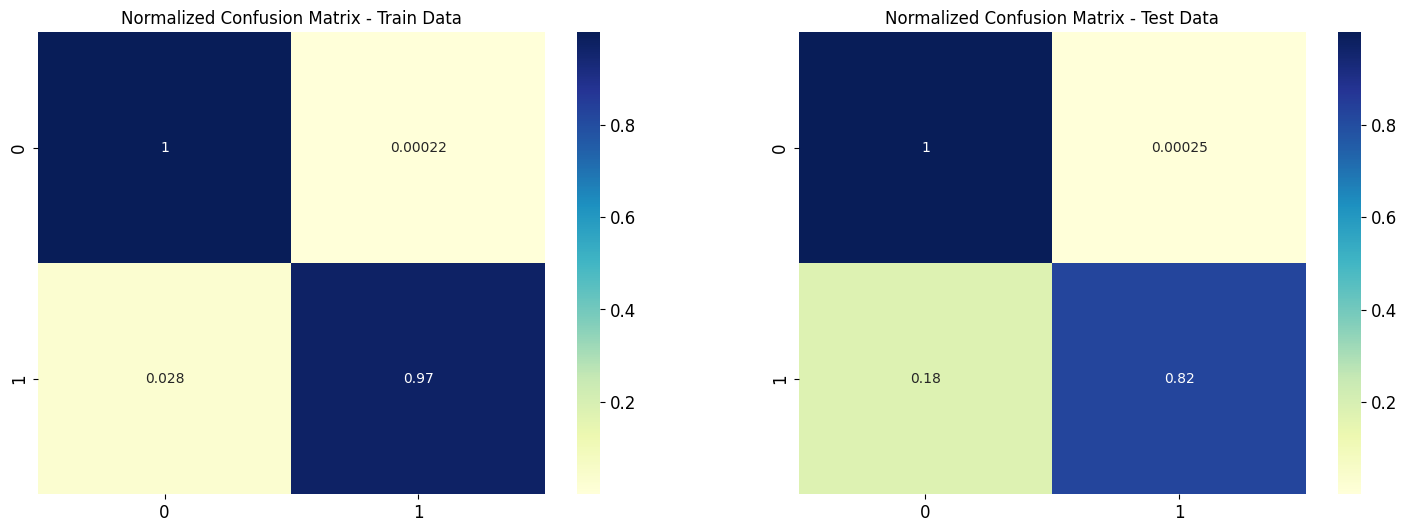

In [ ]:
#Best estimator of random forest
rnd_clf = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100,
            n_jobs=None, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
build_model_train_test(rnd_clf,x_train,x_test,y_train,y_test)

By looking at the performance measures, we can say that Random Forest is definitely giving us better accuracy than SGDClassifier. So I'm going to explore more on Random Forest model further.

In [ ]:
#Check the Feature importance scores from Random Forest model
featimp = pd.Series(rnd_clf.feature_importances_,index=X.columns).sort_values(ascending=False)
print(featimp)

V14       0.164312
V17       0.111522
V4        0.110864
V10       0.105971
V12       0.090800
V11       0.089132
V3        0.044000
V16       0.037266
V9        0.026872
V7        0.025449
V21       0.024069
V19       0.014683
V2        0.014077
V27       0.013317
V1        0.011993
V6        0.011404
Amount    0.011330
V18       0.010765
V20       0.010745
V8        0.010632
V28       0.008788
V15       0.008077
V26       0.006951
V13       0.006788
V22       0.006409
V5        0.006298
V23       0.005365
V25       0.004569
Time      0.004347
V24       0.003203
dtype: float64


We can see that most of the features we have decided to remove after looking at the distribution earlier are having low importance scores in random forest model & also coefficients close to zero at SGCClassifier. Let us remove these features for further analysis.

In [ ]:
cc_data.drop(labels = ['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8','Time'], axis = 1, inplace=True)
cc_data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Amount', 'Class'],
      dtype='object')

In [ ]:
cc_data.describe()

V1            V2            V3            V4            V5  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15  9.604066e-16   
std    1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00  1.380247e+00   
min   -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00 -1.137433e+02   
25%   -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01 -6.915971e-01   
50%    1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02 -5.433583e-02   
75%    1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01  6.119264e-01   
max    2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01  3.480167e+01   

                 V6            V7            V9           V10           V11  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.487313e-15 -5.556467e-16 -2.406331e-15  2.239053e-15  1.673327e-15   
std    1.332271e+00  1.237094e+00  1.098632e+00  1.088850e+00  1.020713e+00   
min   -2.616051e+01 -4.355724e+01 -1.343407e+01 -2.458826e+01 -4.797473e+00   
25%   -7.682956e-01 -5.540759e-01 -6.430976e-01 -5.354257e-01 -7.624942e-01   
50%   -2.741871e-01  4.010308e-02 -5.142873e-02 -9.291738e-02 -3.275735e-02   
75%    3.985649e-01  5.704361e-01  5.971390e-01  4.539234e-01  7.395934e-01   
max    7.330163e+01  1.205895e+02  1.559499e+01  2.374514e+01  1.201891e+01   

                V12           V14           V16           V17           V18  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.247012e-15  1.207294e-15  1.437716e-15 -3.772171e-16  9.564149e-16   
std    9.992014e-01  9.585956e-01  8.762529e-01  8.493371e-01  8.381762e-01   
min   -1.868371e+01 -1.921433e+01 -1.412985e+01 -2.516280e+01 -9.498746e+00   
25%   -4.055715e-01 -4.255740e-01 -4.680368e-01 -4.837483e-01 -4.988498e-01   
50%    1.400326e-01  5.060132e-02  6.641332e-02 -6.567575e-02 -3.636312e-03   
75%    6.182380e-01  4.931498e-01  5.232963e-01  3.996750e-01  5.008067e-01   
max    7.848392e+00  1.052677e+01  1.731511e+01  9.253526e+00  5.041069e+00   

                V19           V21         Amount          Class  
count  2.848070e+05  2.848070e+05  284807.000000  284807.000000  
mean   1.039917e-15  1.654067e-16      88.349619       0.001727  
std    8.140405e-01  7.345240e-01     250.120109       0.041527  
min   -7.213527e+00 -3.483038e+01       0.000000       0.000000  
25%   -4.562989e-01 -2.283949e-01       5.600000       0.000000  
50%    3.734823e-03 -2.945017e-02      22.000000       0.000000  
75%    4.589494e-01  1.863772e-01      77.165000       0.000000  
max    5.591971e+00  2.720284e+01   25691.160000       1.000000

<Axes: xlabel='Amount', ylabel='Density'>

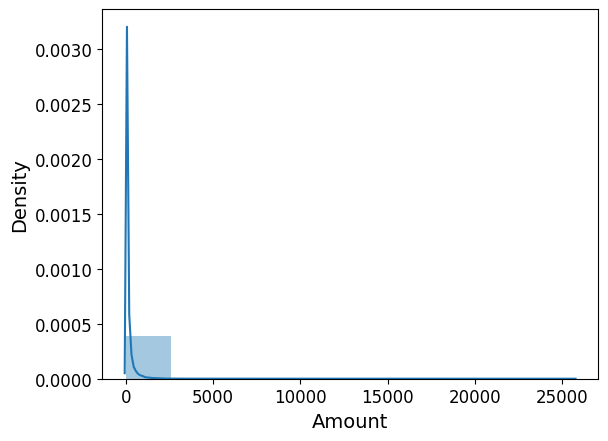

In [ ]:
sns.distplot(cc_data['Amount'],bins=10)

The feature 'Amount' has higher standard deviation of 250, which indicate the spread is very high & also we might have outliers in the data. So let us go for feature scaling for Amount variable using StandardScaler().

In [ ]:
cc_data['Amount'] = StandardScaler().fit_transform(cc_data['Amount'].values.reshape(-1, 1))
cc_data.describe

<bound method NDFrame.describe of                V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V9       V10       V11       V12       V14       V16  \
0       0.239599  0.3

<Axes: xlabel='Amount', ylabel='Density'>

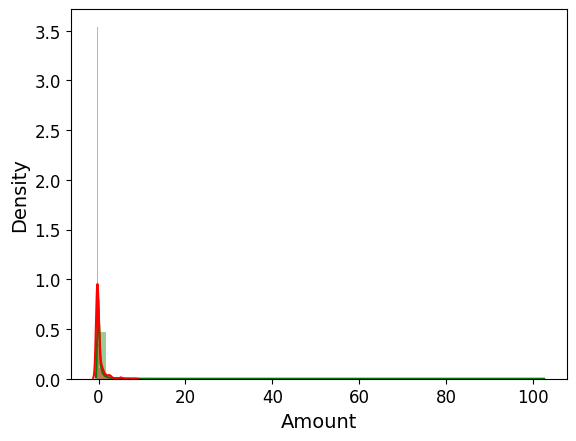

In [ ]:
sns.distplot(cc_data['Amount'][cc_data['Class']==0],color='g',label='Legit')
sns.distplot(cc_data['Amount'][cc_data['Class']==1],color='r',label='Fraud')

In [ ]:
#Data Preparation
x_train,x_test,y_train,y_test = data_preparation(cc_data)

Length of training data 227845
Length of test data 56962



   Accuracy Scores on Train data 
F1 Score:  0.9228915662650603
Precision Score:  0.8724373576309795
Recall Score:  0.979539641943734

   Accuracy Scores on Cross validation data 
F1 Score:  0.8210526315789473
Precision Score:  0.8455284552845529
Recall Score:  0.7979539641943734

---Accuracy Scores on Test data---
F1 Score:  0.8374384236453202
Precision Score:  0.8333333333333334
Recall Score:  0.8415841584158416


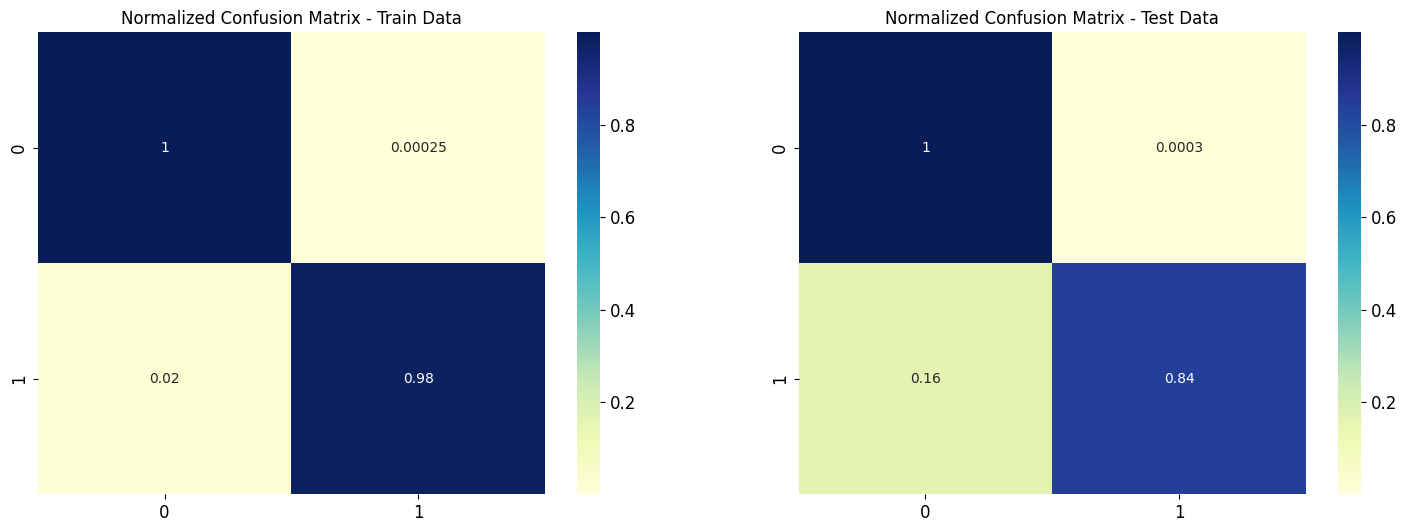

In [ ]:
#Let us check the performance of RandomForest after removing few features
build_model_train_test(rnd_clf,x_train,x_test,y_train,y_test)

You can notice that RandomForest has given pretty decent performance on this dataset though it is overfitting little bit. Also notice that same accuracy is maintained even after removing the features ('V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8','Time').

developing KNN algorithm here, mainly to use it in Voting Classifier. But KNN is giving us pretty good performance as well.


   Accuracy Scores on Train data 
F1 Score:  0.8885793871866295
Precision Score:  0.9755351681957186
Recall Score:  0.8158567774936062

   Accuracy Scores on Cross validation data 
F1 Score:  0.8523676880222842
Precision Score:  0.9357798165137615
Recall Score:  0.782608695652174

---Accuracy Scores on Test data---
F1 Score:  0.8631578947368421
Precision Score:  0.9213483146067416
Recall Score:  0.8118811881188119


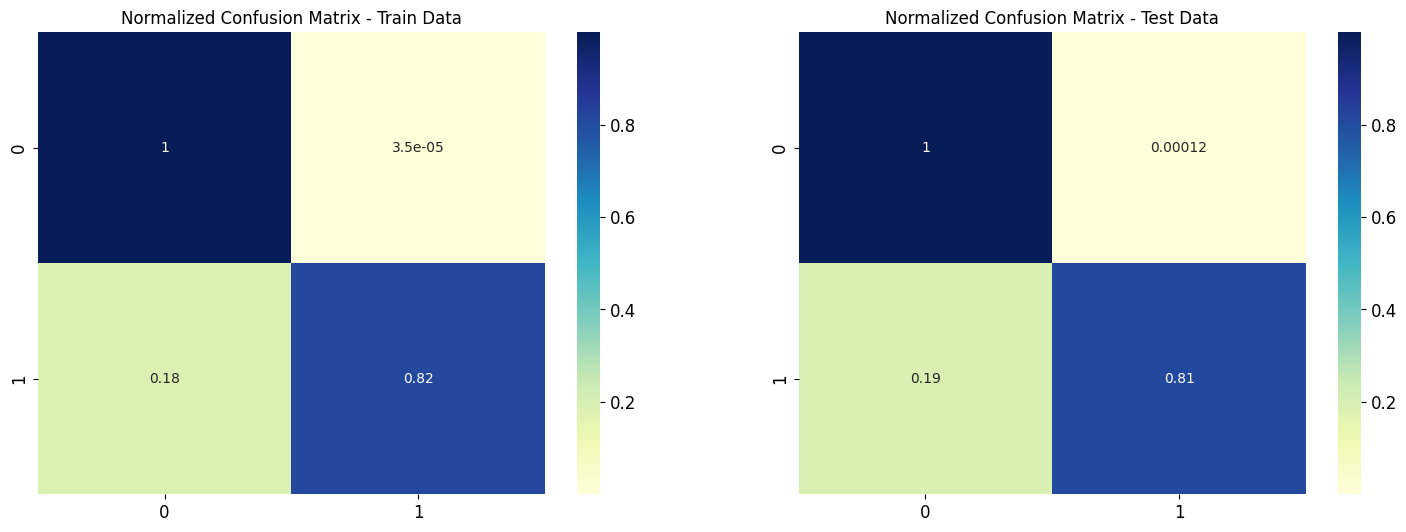

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
build_model_train_test(knn_clf,x_train,x_test,y_train,y_test)

Let us also try AdaBoostClassifier before using voting classifier. Looking at below scores, we can say that AdaBoost is overfitting on the training data. Overall a good performance on the cross validation and test dataset nevertheless.


   Accuracy Scores on Train data 
F1 Score:  1.0
Precision Score:  1.0
Recall Score:  1.0

   Accuracy Scores on Cross validation data 
F1 Score:  0.8315217391304348
Precision Score:  0.8869565217391304
Recall Score:  0.782608695652174

---Accuracy Scores on Test data---
F1 Score:  0.8290155440414507
Precision Score:  0.8695652173913043
Recall Score:  0.7920792079207921


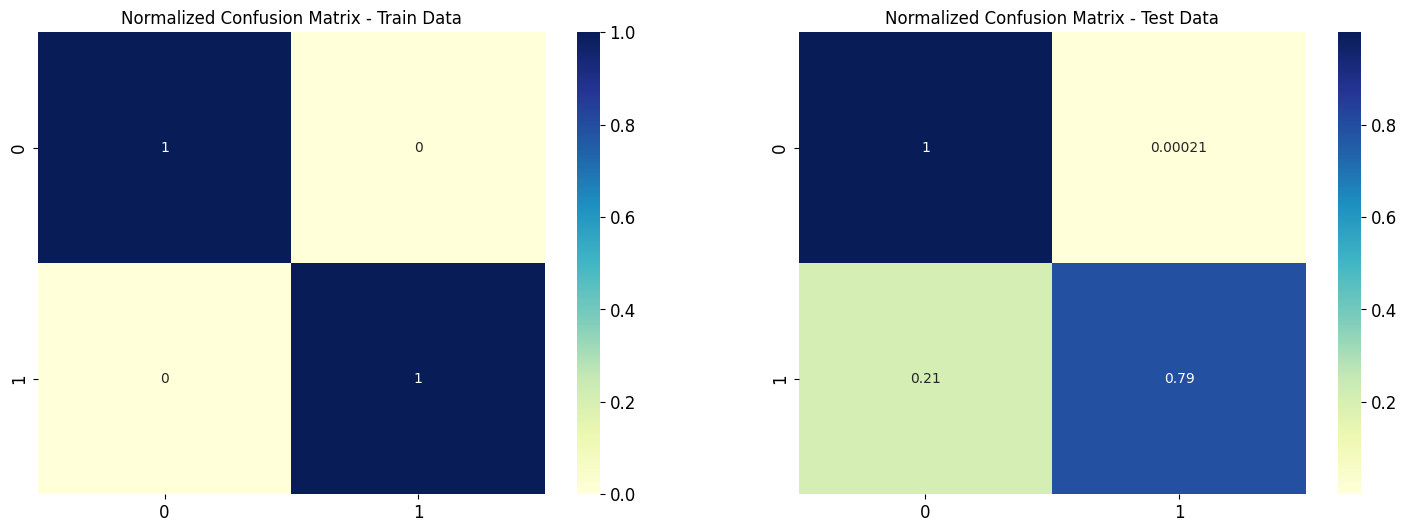

In [ ]:
ada_clf = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=3,class_weight='balanced'), n_estimators=100,
        algorithm="SAMME.R", learning_rate=0.5, random_state=0
    )
build_model_train_test(ada_clf,x_train,x_test,y_train,y_test)

RandomForest, AdaBoost & KNN are all providing good accuracy measures. So let us include all of them in a soft voting classifier and see if we can improve the performance even further.


   Accuracy Scores on Train data 
F1 Score:  0.9548387096774194
Precision Score:  0.9635416666666666
Recall Score:  0.9462915601023018

   Accuracy Scores on Cross validation data 
F1 Score:  0.8571428571428572
Precision Score:  0.9258160237388724
Recall Score:  0.7979539641943734

---Accuracy Scores on Test data---
F1 Score:  0.8704663212435233
Precision Score:  0.9130434782608695
Recall Score:  0.8316831683168316


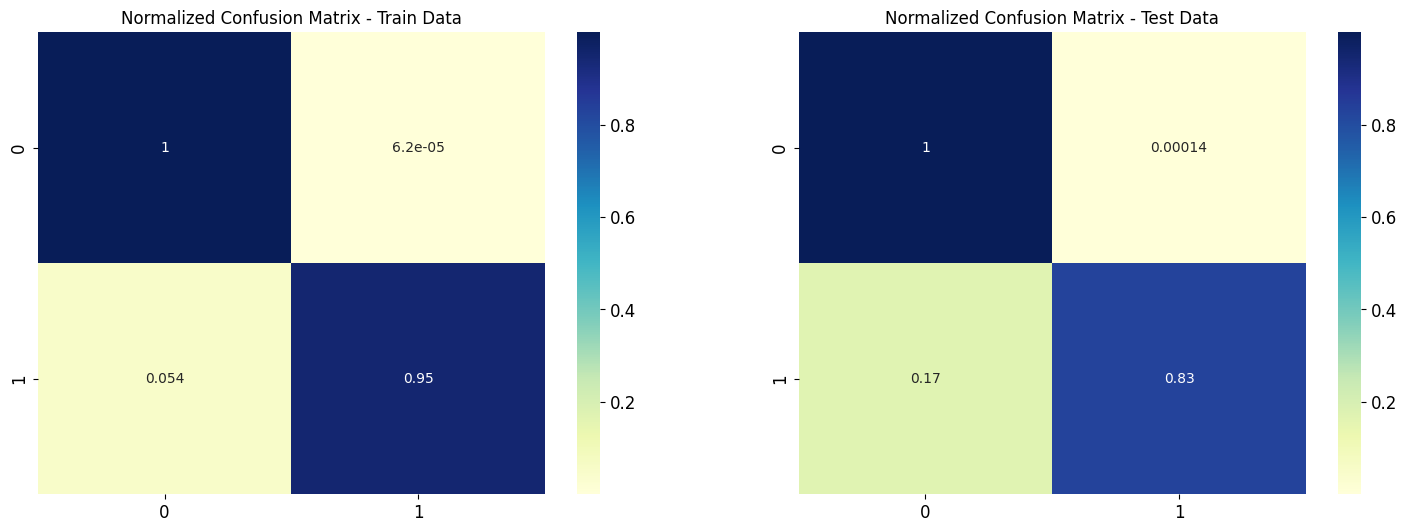

In [ ]:
soft_voting_clf = VotingClassifier(
    estimators=[('rf', rnd_clf), ('ada', ada_clf), ('knn',knn_clf)],
    voting='soft')

build_model_train_test(soft_voting_clf,x_train,x_test,y_train,y_test)

the outcome of Voting Classifier here, though it is over fitting on the train data set a deviation of 5% is acceptable. I'd like to improve the recall score further. So let us use predict_proba to get the probabilities and see if we can improve the recall by using a different threshold.

In [ ]:
#Probability scores for each record for prediction
probs_sv_test = soft_voting_clf.predict_proba(x_test)

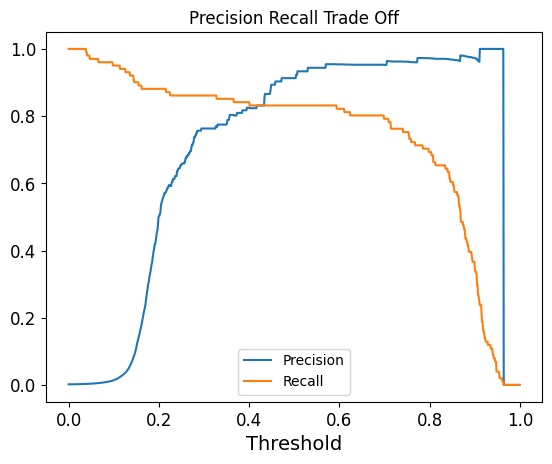

Best F1 Score 0.888889
Best Precision Score 0.954545
Best Recall Score 0.831683
Best Epsilon Score 0.5700000000000001


In [ ]:
#Choose the best probability threshold where F1-score is highest
SelectThresholdByCV(probs_sv_test[:,1],y_test)

In [ ]:
y_pred_test = (probs_sv_test[:,1] > 0.571)
Print_Accuracy_Scores(y_test,y_pred_test)

F1 Score:  0.888888888888889
Precision Score:  0.9545454545454546
Recall Score:  0.8316831683168316


However we couldn't improve the recall score much on the test data. Precision is going down drastically if we try to improve recall little bit. So imagine that the model has given us best results with 83 recall score and 95 precision score at 0.57 threshold.

Conclusion: From adhoc approach, we have seen slightly better results for Voting Classifier than RandomForest. So we could go with Voting Classifier with F1-score of 89 and Recall score of 83. However we are going to check the performance of both Voting Classifier and RandomForest in our next approach using resampling technique.

Approach 2 - Resampling Techniques
In this approach we are going to balance the data using resampling techniques. The main objective of resampling is to balance classes by either increasing the frequency of minority class or decreasing the frequency of majority class.

We can use imbalanced-learn library of python to resample the data. But we are going to use manual approach first for the demonstration purpose and see the synthetic approach later on using oversampling.

Step1 - Under Sampling
Here we randomly choose only a sample of genuine records, which will make sure to balance the instances of majority and minority classes.

In [ ]:
Legit_data = cc_data[cc_data['Class']==0]
Fraud_data = cc_data[cc_data['Class']==1]

In [ ]:
Legit_indexes = Legit_data.index
Fraud_indexes = Fraud_data.index
count_genuine = len(Legit_data)
count_fraud = len(Fraud_data)

In [ ]:
#Choose a smaple of genuine records which is equal to number of fraud records
Legit_indexes_undersample = np.random.choice(Legit_indexes,count_fraud,replace=False)
print(len(Legit_indexes_undersample))

492


In [ ]:
#Merge under-sampled genuine records with fraud records to get the final under-sampled dataset
undersample_indexes = np.concatenate((Legit_indexes_undersample,Fraud_indexes),axis=0)
print(len(undersample_indexes))

984


In [ ]:
undersample_data = cc_data.iloc[undersample_indexes,:].values

In [ ]:
#Split X & Y
undersample_data_x = undersample_data[:,0:-1]
undersample_data_y = undersample_data[:,-1]


   Accuracy Scores on Train data 
F1 Score:  1.0
Precision Score:  1.0
Recall Score:  1.0

   Accuracy Scores on Cross validation data 
F1 Score:  0.9375661375661376
Precision Score:  0.977924944812362
Recall Score:  0.9004065040650406

---Accuracy Scores on Test data---
F1 Score:  0.15868028279654361
Precision Score:  0.08617747440273038
Recall Score:  1.0


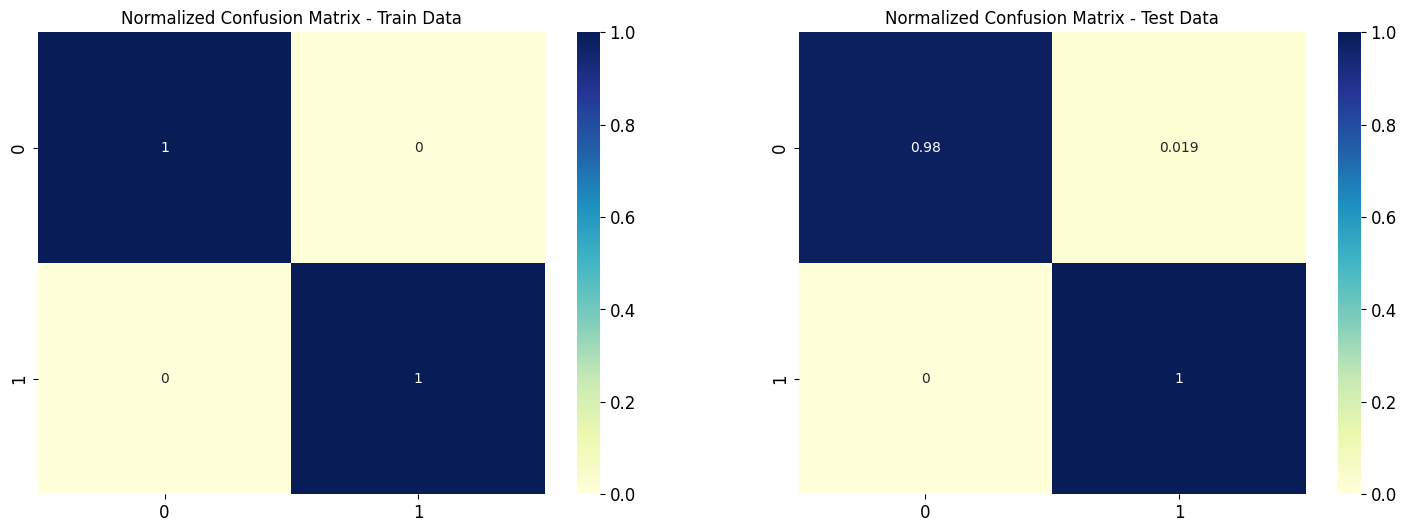

In [ ]:
#Model building on under-sampled train data and then check the accuracy scores on train, test data.
#Note: Class_weight='balanced' parameter is removed for the model on under-sample since the training data is balanced after using under-sampling technique.
rnd_clf = RandomForestClassifier(n_estimators=100,criterion='gini', n_jobs=-1, random_state=0)
#Train the model on under-sampled data and check the performance on actual test data
build_model_train_test(rnd_clf,undersample_data_x,x_test,undersample_data_y,y_test)

we can notice that precision has gone down miserably on the original imbalanced test data when we trained the model on under-sampled data. This is due to potential loss of information/examples during the training. So the under-sampled data will not be an accurate representation of the population. Thereby, resulting in inaccurate results with the actual test data set.

Step2 - Over Sampling
Over-Sampling increases the number of instances in the minority class by randomly replicating them in order to present a higher representation of the minority class in the sample.

In [ ]:
y_train = y_train.values.reshape(-1, 1)
#Reshaping Y to 2 dimensional array

data_train = np.hstack((x_train,y_train)) #Stack Y label with input X array
print("Training Data Length",len(data_train))
genuine_data = data_train[data_train[:,-1]==0]
print("Legit Data Length",len(Legit_data))
fraud_data = data_train[data_train[:,-1]==1]
print("Fraud Data Length",len(Fraud_data))

Training Data Length 227845
Legit Data Length 284315
Fraud Data Length 492


In [ ]:
#Code for adding the fraud records 200 times to the training set. So overall we are able to get 75:25 ratio of Legit to fraud class in the over-sampled data.
oversample_data = genuine_data.copy()
for i in range(200):
    oversample_data = np.vstack((oversample_data,fraud_data))

print("Training Data Length",len(oversample_data))
print("Genuine Data Length",len(oversample_data[oversample_data[:,-1]==0]))
print("Fraud Data Length",len(oversample_data[oversample_data[:,-1]==1]))

Training Data Length 305654
Genuine Data Length 227454
Fraud Data Length 78200


In [ ]:
#Split X & Y
os_data_x = oversample_data[:,0:-1]
os_data_y = oversample_data[:,-1]


   Accuracy Scores on Train data 
F1 Score:  1.0
Precision Score:  1.0
Recall Score:  1.0

   Accuracy Scores on Cross validation data 
F1 Score:  0.9998657469265636
Precision Score:  0.9997315298960637
Recall Score:  1.0

---Accuracy Scores on Test data---
F1 Score:  0.8723404255319149
Precision Score:  0.9425287356321839
Recall Score:  0.8118811881188119


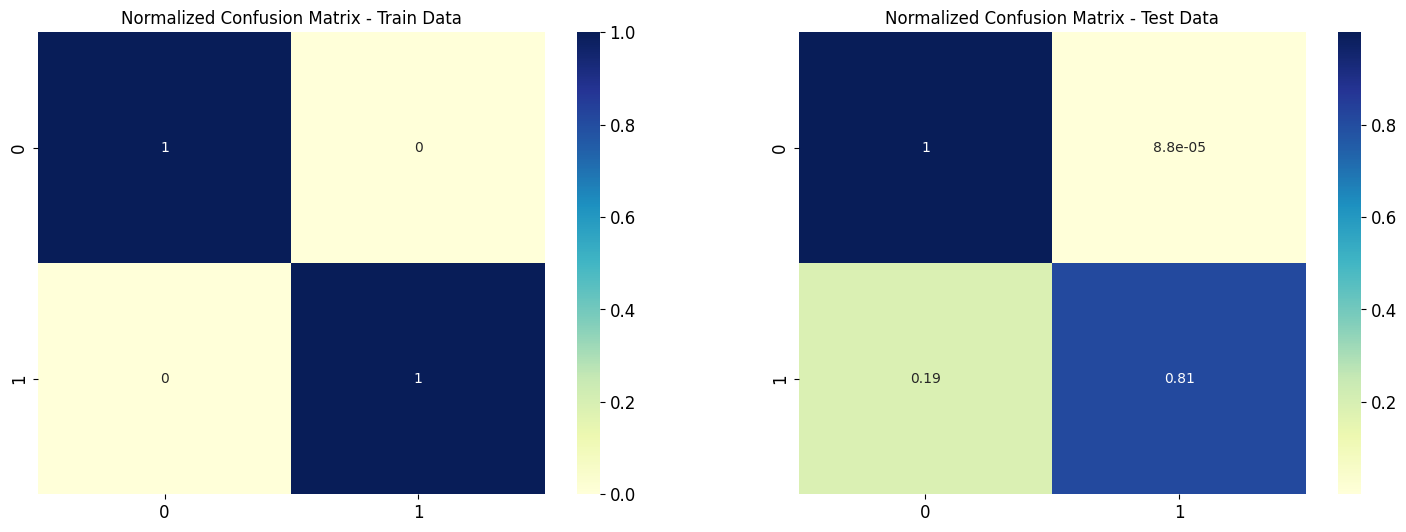

In [ ]:
#Model building on over-sampled train data and then check the accuracy scores on train and test data.
rnd_clf = RandomForestClassifier(n_estimators=100,criterion='gini',class_weight='balanced',n_jobs=-1, random_state=0)
#Train the model on over-sampled data and check the performance on actual test data
build_model_train_test(rnd_clf,os_data_x,x_test,os_data_y,y_test)

In [ ]:
#Probability score for each record for prediction
probs_rf_test = rnd_clf.predict_proba(x_test)

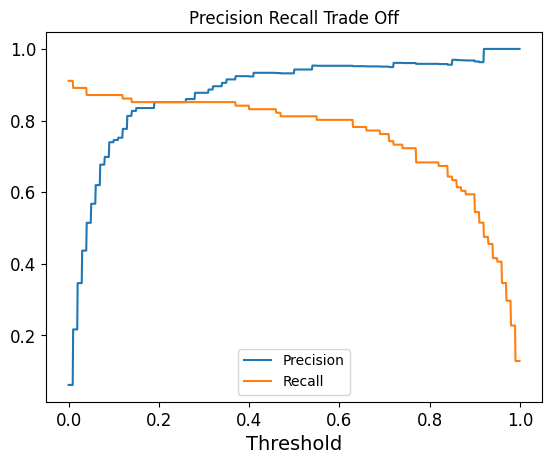

Best F1 Score 0.882051
Best Precision Score 0.914894
Best Recall Score 0.851485
Best Epsilon Score 0.35000000000000003


In [ ]:
#Choose the best probability threshold where F1-score is highest
SelectThresholdByCV(probs_rf_test[:,1],y_test)

In [ ]:
y_pred_test = (probs_rf_test[:,1] > 0.32)
Print_Accuracy_Scores(y_test,y_pred_test)

F1 Score:  0.8730964467005076
Precision Score:  0.8958333333333334
Recall Score:  0.8514851485148515


Conclusion: Over-sampling fraud records to 25% of overall training samples is providing best results when combined with class_weight='balanced' parameter for RandomForest.

In [ ]:
#Let us check the cross validation scores on the original train data set
cv_score = cross_val_score(rnd_clf,x_train,y_train,cv=5,scoring='f1')
print("Average F1 score--CV",cv_score.mean())

Average F1 score--CV 0.8330719146681481


In [ ]:
cv_score = cross_val_score(rnd_clf,x_train,y_train,cv=5,scoring='recall')
print("Average Recall score--CV",cv_score.mean())

Average Recall score--CV 0.7416423239208049


From the above cross validation scores, it looks like the RandomForest model is overfitting little bit. We will use the scores on cross validation for choosing the best model.

Let us check the performance of Soft Voting Classifier as well on this over-sampled data.


   Accuracy Scores on Train data 
F1 Score:  0.9999936061789887
Precision Score:  0.9999872124397386
Recall Score:  1.0

   Accuracy Scores on Cross validation data 
F1 Score:  0.9997762649023556
Precision Score:  0.9995526298971049
Recall Score:  1.0

---Accuracy Scores on Test data---
F1 Score:  0.8808290155440415
Precision Score:  0.9239130434782609
Recall Score:  0.8415841584158416


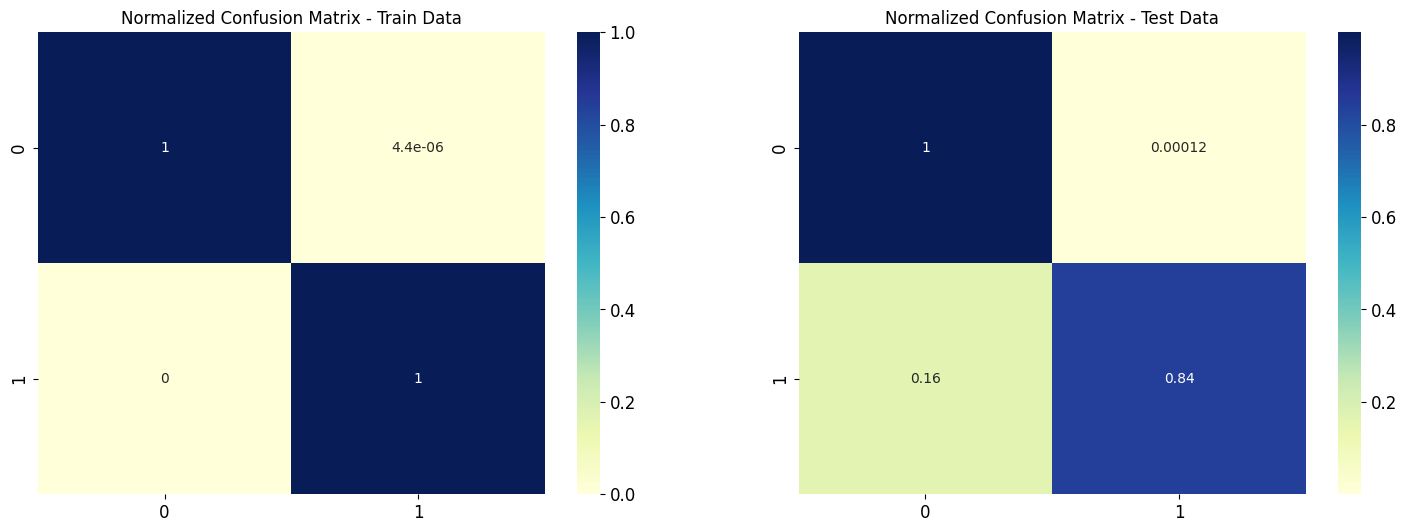

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=100,criterion='gini',class_weight='balanced', n_jobs=-1, random_state=0)

ada_clf = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=3,class_weight='balanced'), n_estimators=100,
        algorithm="SAMME.R", learning_rate=0.5, random_state=0
    )
knn_clf = KNeighborsClassifier(n_neighbors=3)

soft_voting_clf = VotingClassifier(
    estimators=[('rf', rnd_clf), ('ada', ada_clf), ('knn',knn_clf)],
    voting='soft')

#Train the model on oversampled data and check the performance on actual test data
build_model_train_test(soft_voting_clf,os_data_x,x_test,os_data_y,y_test)

In [ ]:
#Probability scores for each record for prediction
probscore_sv_test = soft_voting_clf.predict_proba(x_test)

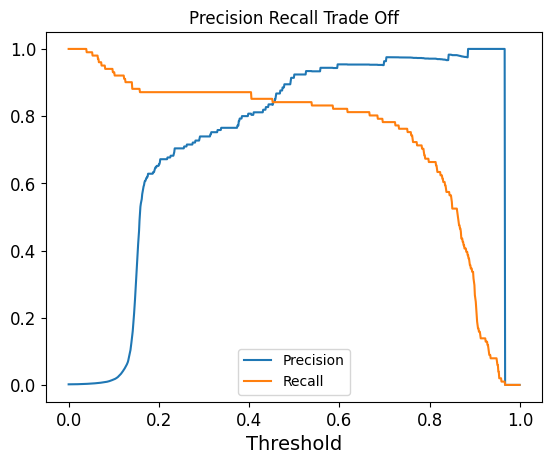

Best F1 Score 0.885417
Best Precision Score 0.934066
Best Recall Score 0.841584
Best Epsilon Score 0.526


In [ ]:
#Choose the best probability threshold where F1-score is highest
SelectThresholdByCV(probscore_sv_test[:,1],y_test)

In [ ]:
y_pred_test = (probs_sv_test[:,1] > 0.546)
Print_Accuracy_Scores(y_test,y_pred_test)

F1 Score:  0.8842105263157894
Precision Score:  0.9438202247191011
Recall Score:  0.8316831683168316


Using Soft Voting Classifier, recall is improving little bit when we reduce the threshold. However precision is going down pretty quickly to improve little bit of recall. So I choose the threshold of 0.546, which is giving us reasonable recall (in line with the original model) and the best precision score.

Note: Oversampled data has given slightly better results than the original data (F1 score of 89 vs 88) with slight increase in recall and precision.

So we can conclude that over-sampling fraud records to 25% of overall training samples is providing best results when combined with class_weight='balanced' parameter using soft voting classifier.

In [ ]:
#Let us check the cross validation scores on the original train data set
cv_score = cross_val_score(soft_voting_clf,x_train,y_train,cv=5,scoring='f1')
print("Average F1 score--CV",cv_score.mean())

Average F1 score--CV 0.8499358633313749


In [ ]:
cv_score = cross_val_score(soft_voting_clf,x_train,y_train,cv=5,scoring='recall')
print("Average Recall score--CV",cv_score.mean())

Average Recall score--CV 0.7774423888347938


Conclusion: Both RandomForest and Voting Classifier have given us similar results on the over-sampled data using manual process(projecting fraud cases to 25% of the total training examples).

However Voting Classifier has given better results on K-fold cross validation on the original train dataset. So I'd go with Voting Classifier as the final model selection using manual process of over-sampling.

Step3 - Over Sampling using SMOTE
imbalanced-learn is a python package offering a number of re-sampling techniques commonly used in datasets showing strong between-class imbalance. It is compatible with scikit-learn and is part of scikit-learn-contrib projects.

imbalanced-learn is currently available on the PyPi's repository and you can install it via pip: pip install -U imbalanced-learn

Here we are going to explore Synthetic Minority Oversampling Technique (SMOTE).

In [ ]:
ovsam = SMOTE(random_state=0)

In [ ]:
from imblearn.over_sampling import SMOTE

#Initialize SMOTE object
ovsam = SMOTE()

#Generate the oversample data
os_res_x, os_res_y = ovsam.fit_resample(x_train, y_train)

#Counts of each class in oversampled data
print(sorted(Counter(os_res_y).items()))


[(0, 227454), (1, 227454)]


We can see that fraud records are imputed and brought close to genuine records in this oversampled data using SMOTE. Hence both classes are equally distributed now.


   Accuracy Scores on Train data 
F1 Score:  1.0
Precision Score:  1.0
Recall Score:  1.0

   Accuracy Scores on Cross validation data 
F1 Score:  0.9998659243417654
Precision Score:  0.9997362788060462
Recall Score:  0.9999956035066431

---Accuracy Scores on Test data---
F1 Score:  0.8415841584158416
Precision Score:  0.8415841584158416
Recall Score:  0.8415841584158416


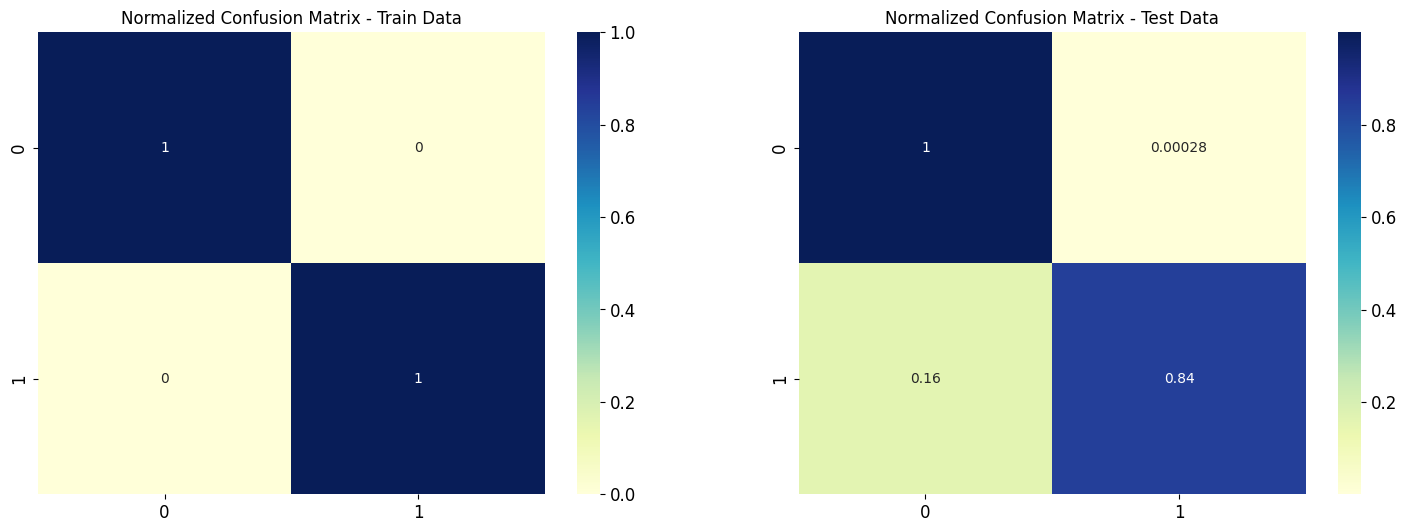

In [ ]:
#RandomForest for training over-sampled data set.
#Note: we have removed class_weight='balanced' since the data is balanced using SMOTE.
rnd_clf = RandomForestClassifier(n_estimators=100,criterion='gini',n_jobs=-1, random_state=0)
#Train the model on oversampled data and check the performance on actual test data
build_model_train_test(rnd_clf,os_res_x,x_test,os_res_y,y_test)

In [ ]:
#Probability scores for each record for prediction
probscore_rf_test = rnd_clf.predict_proba(x_test)

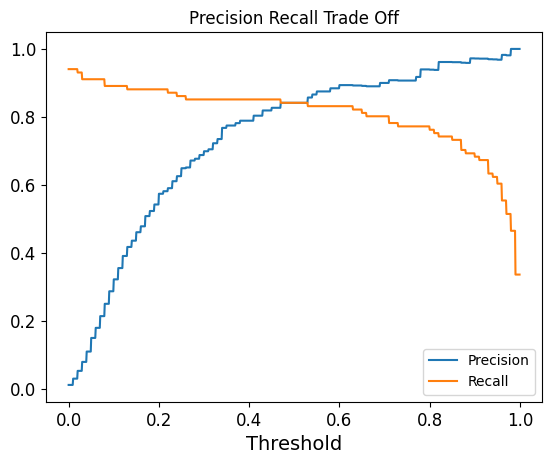

Best F1 Score 0.861538
Best Precision Score 0.893617
Best Recall Score 0.831683
Best Epsilon Score 0.6


In [ ]:
#Choose the best probability threshold where F1-score is highest
SelectThresholdByCV(probscore_rf_test[:,1],y_test)

In [ ]:
y_pred_test = (probs_rf_test[:,1] > 0.63)
Print_Accuracy_Scores(y_test,y_pred_test)

F1 Score:  0.858695652173913
Precision Score:  0.9518072289156626
Recall Score:  0.7821782178217822


We could improve the precision score by changing the threshold to 0.63

In [ ]:
#Let us check cross validation scores on the orginal train data
cv_score = cross_val_score(rnd_clf,x_train,y_train,cv=5,scoring='f1')
print("Average F1 score--CV",cv_score.mean())

Average F1 score--CV 0.8534356123260161


In [ ]:
cv_score = cross_val_score(rnd_clf,x_train,y_train,cv=5,scoring='recall')
print("Average Recall score--CV",cv_score.mean())

Average Recall score--CV 0.7775073028237585


RandomForest has almost the same results on test data for both manual and synthetic over-sampling approaches: F1 score of 88 using manual approach vs 86 using synthetic approach and both the approaches providing 85 recall score.

However on the cross validation, Synthetic approach (F1-score of 85 and Recall score of 78) has better scores compared to manual approach (F1-score of 82 and Recall score of 73).

So SMOTE has an edge over manual over-sampling approach for RandomForest.

Let us check the performance of Soft Voting Classifier on this over-sampled data.


   Accuracy Scores on Train data 
F1 Score:  0.9999780180164337
Precision Score:  0.9999560369992614
Recall Score:  1.0

   Accuracy Scores on Cross validation data 
F1 Score:  0.9996462074982035
Precision Score:  0.9992926652461394
Recall Score:  1.0

---Accuracy Scores on Test data---
F1 Score:  0.7719298245614035
Precision Score:  0.6929133858267716
Recall Score:  0.8712871287128713


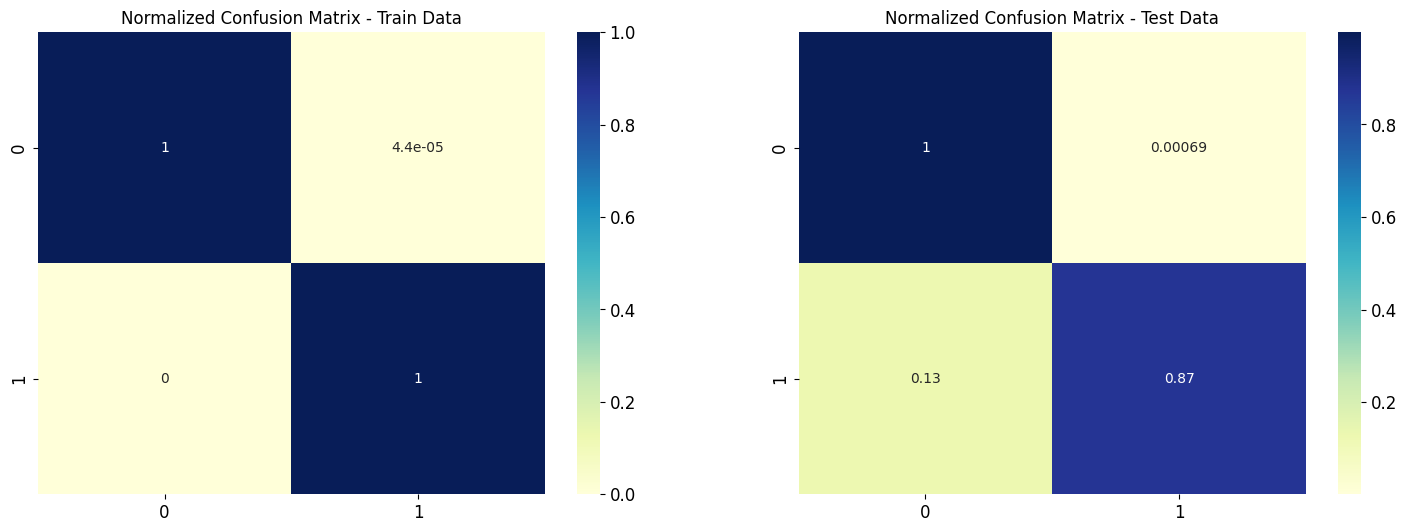

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators=100,criterion='gini', n_jobs=-1, random_state=0)

ada_clf = AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=3), n_estimators=100,
        algorithm="SAMME.R", learning_rate=0.5, random_state=0
    )
knn_clf = KNeighborsClassifier(n_neighbors=3)

soft_voting_clf = VotingClassifier(
    estimators=[('rf', rnd_clf), ('ada', ada_clf), ('knn',knn_clf)],
    voting='soft')

#Train the model on oversampled data and check the performance on actual test data
build_model_train_test(soft_voting_clf,os_res_x,x_test,os_res_y,y_test)

Precision score has gone down on test data using Synthetic over-sampled data approach. This could be because of the model parameters. Let us try to change the threshold and see if we can improve precision while still maintaining the recall score around 85.

In [ ]:
#Probability scores for each record for prediction
probs_sv_test = soft_voting_clf.predict_proba(x_test)

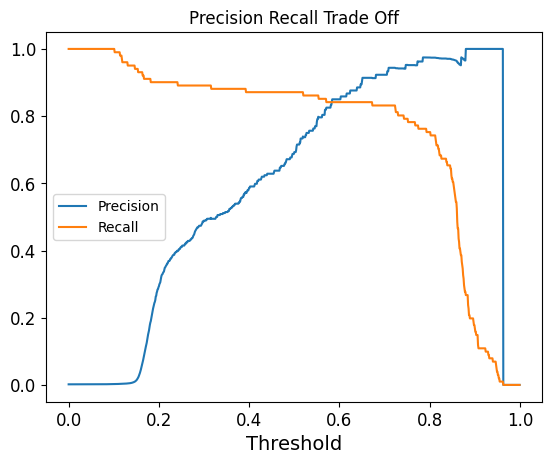

Best F1 Score 0.884211
Best Precision Score 0.943820
Best Recall Score 0.831683
Best Epsilon Score 0.709


In [ ]:
#Choose the best probability threshold where F1-score is highest
SelectThresholdByCV(probs_sv_test[:,1],y_test)

In [ ]:
y_pred_test = (probs_sv_test[:,1] > 0.718)
Print_Accuracy_Scores(y_test,y_pred_test)

F1 Score:  0.8842105263157894
Precision Score:  0.9438202247191011
Recall Score:  0.8316831683168316


In [ ]:
#Let us check cross validation scores on the original train data
cv_score = cross_val_score(soft_voting_clf,x_train,y_train,cv=5,scoring='f1')
print("Average F1 score--CV",cv_score.mean())

Average F1 score--CV 0.8535706041421678


In [ ]:
cv_score = cross_val_score(soft_voting_clf,x_train,y_train,cv=5,scoring='recall')
print("Average Recall score--CV",cv_score.mean())

Average Recall score--CV 0.7851671535215837


Voting Classifier has given almost the same results on test data and cross validation for both manual over-sampling and synthetic over-sampling. PN: Accuracy is almost same using adhoc approach as well for Voting classifier. (F1 score of 89 and recall score of 83). So Voting classifier has performed consistently in all 3 trials we did so far.

Whereas RandomForest is not far behind too and given the same accuracy scores as Voting Classifier using SMOTE.

So I'd recommend using SMOTE approach and choose either RandomForest or Soft Voting Classifier as the final model.

**Approach 3** - Anomaly Detection using Gaussian (Normal) Distribution
For training and evaluating Gaussian distribution algorithms, we are going to split the train, cross validation and test data sets using blow ratios. 1) Train: 60% of the Genuine records (y=0), no Fraud records(y=1). So the training set will not have a label as well. 2) CV: 20% of the Genuine records (y=0), 50% of the Fraud records(y=1) 3) Test: Remaining 20% of the Genuine records(y=0), Remaining 50% of the Fraud records(y=1)

Procedure for anomaly detection: 1) Fit the model p(x) on training set. 2) On cross validation/test data, predict y = 1 if p(x) < epsilon (anomaly) y = 0 if p(x) >= epsilon (normal) 3) We use cross validation to choose parameter epsilon using the evaluation metrics Preceion/Recall, F1-score.

We could use couple of Gaussian distribution models for training anomaly detection. 1) Gaussian (Normal) Distribution - the normal distribution is parametrized in terms of the mean and the variance. 2) Multivariate Normal Distribution - The probability density function for multivariate_normal is parametrized in terms of the mean and the covariance.

For this dataset, we are going to use multivariate normal probability density function, since it automatically generates the relationships (correlation) between variables to calculate the probabilities. So we don't need to derive new features. As the features are outcome of PCA, it is difficult for us to understand the relationship between these features.

However multivariate normal probability density function is computationally expensive compared to normal Gaussian probability density function. On very large datasets, we might have to prefer Gaussian probability density function instead of multivariate normal probability density function to speed up the process and do feature engineering based on the subject matter expertise.

Features that we choose for these algorithms have to be normally distributed. Otherwise we need to transform the features to normal distribution using log, sqrt etc.

Choose features that might take on unusually large or small values in the event of an anomaly. We looked at the distribution in the beginning using distplot. So it is wise to choose features which have completely different distribution for fraud records compared to genuine records.

In [ ]:
#Loading Dataset
cc_ds = pd.read_csv("creditcard.csv")

Below features has almost same distribution for both genuine & fraud records. So they wouldn't be of much help in anomaly detection algorithm.

In [ ]:

cc_ds.drop(labels = ['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8','Time'], axis = 1, inplace=True)


Below features doesn't have the same distribution for both genuine & fraud records. However distribution for fraud records is not unusual as well. So I'll delete these features as well, since the features with unusual behavior for Fraud records will be most useful in anomaly detection algorithm.

In [ ]:
cc_ds.drop(labels = ['V1','V2','V5','V6','V7','V21','Amount'], axis = 1, inplace=True)
cc_ds.columns

Index(['V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18',
       'V19', 'Class'],
      dtype='object')

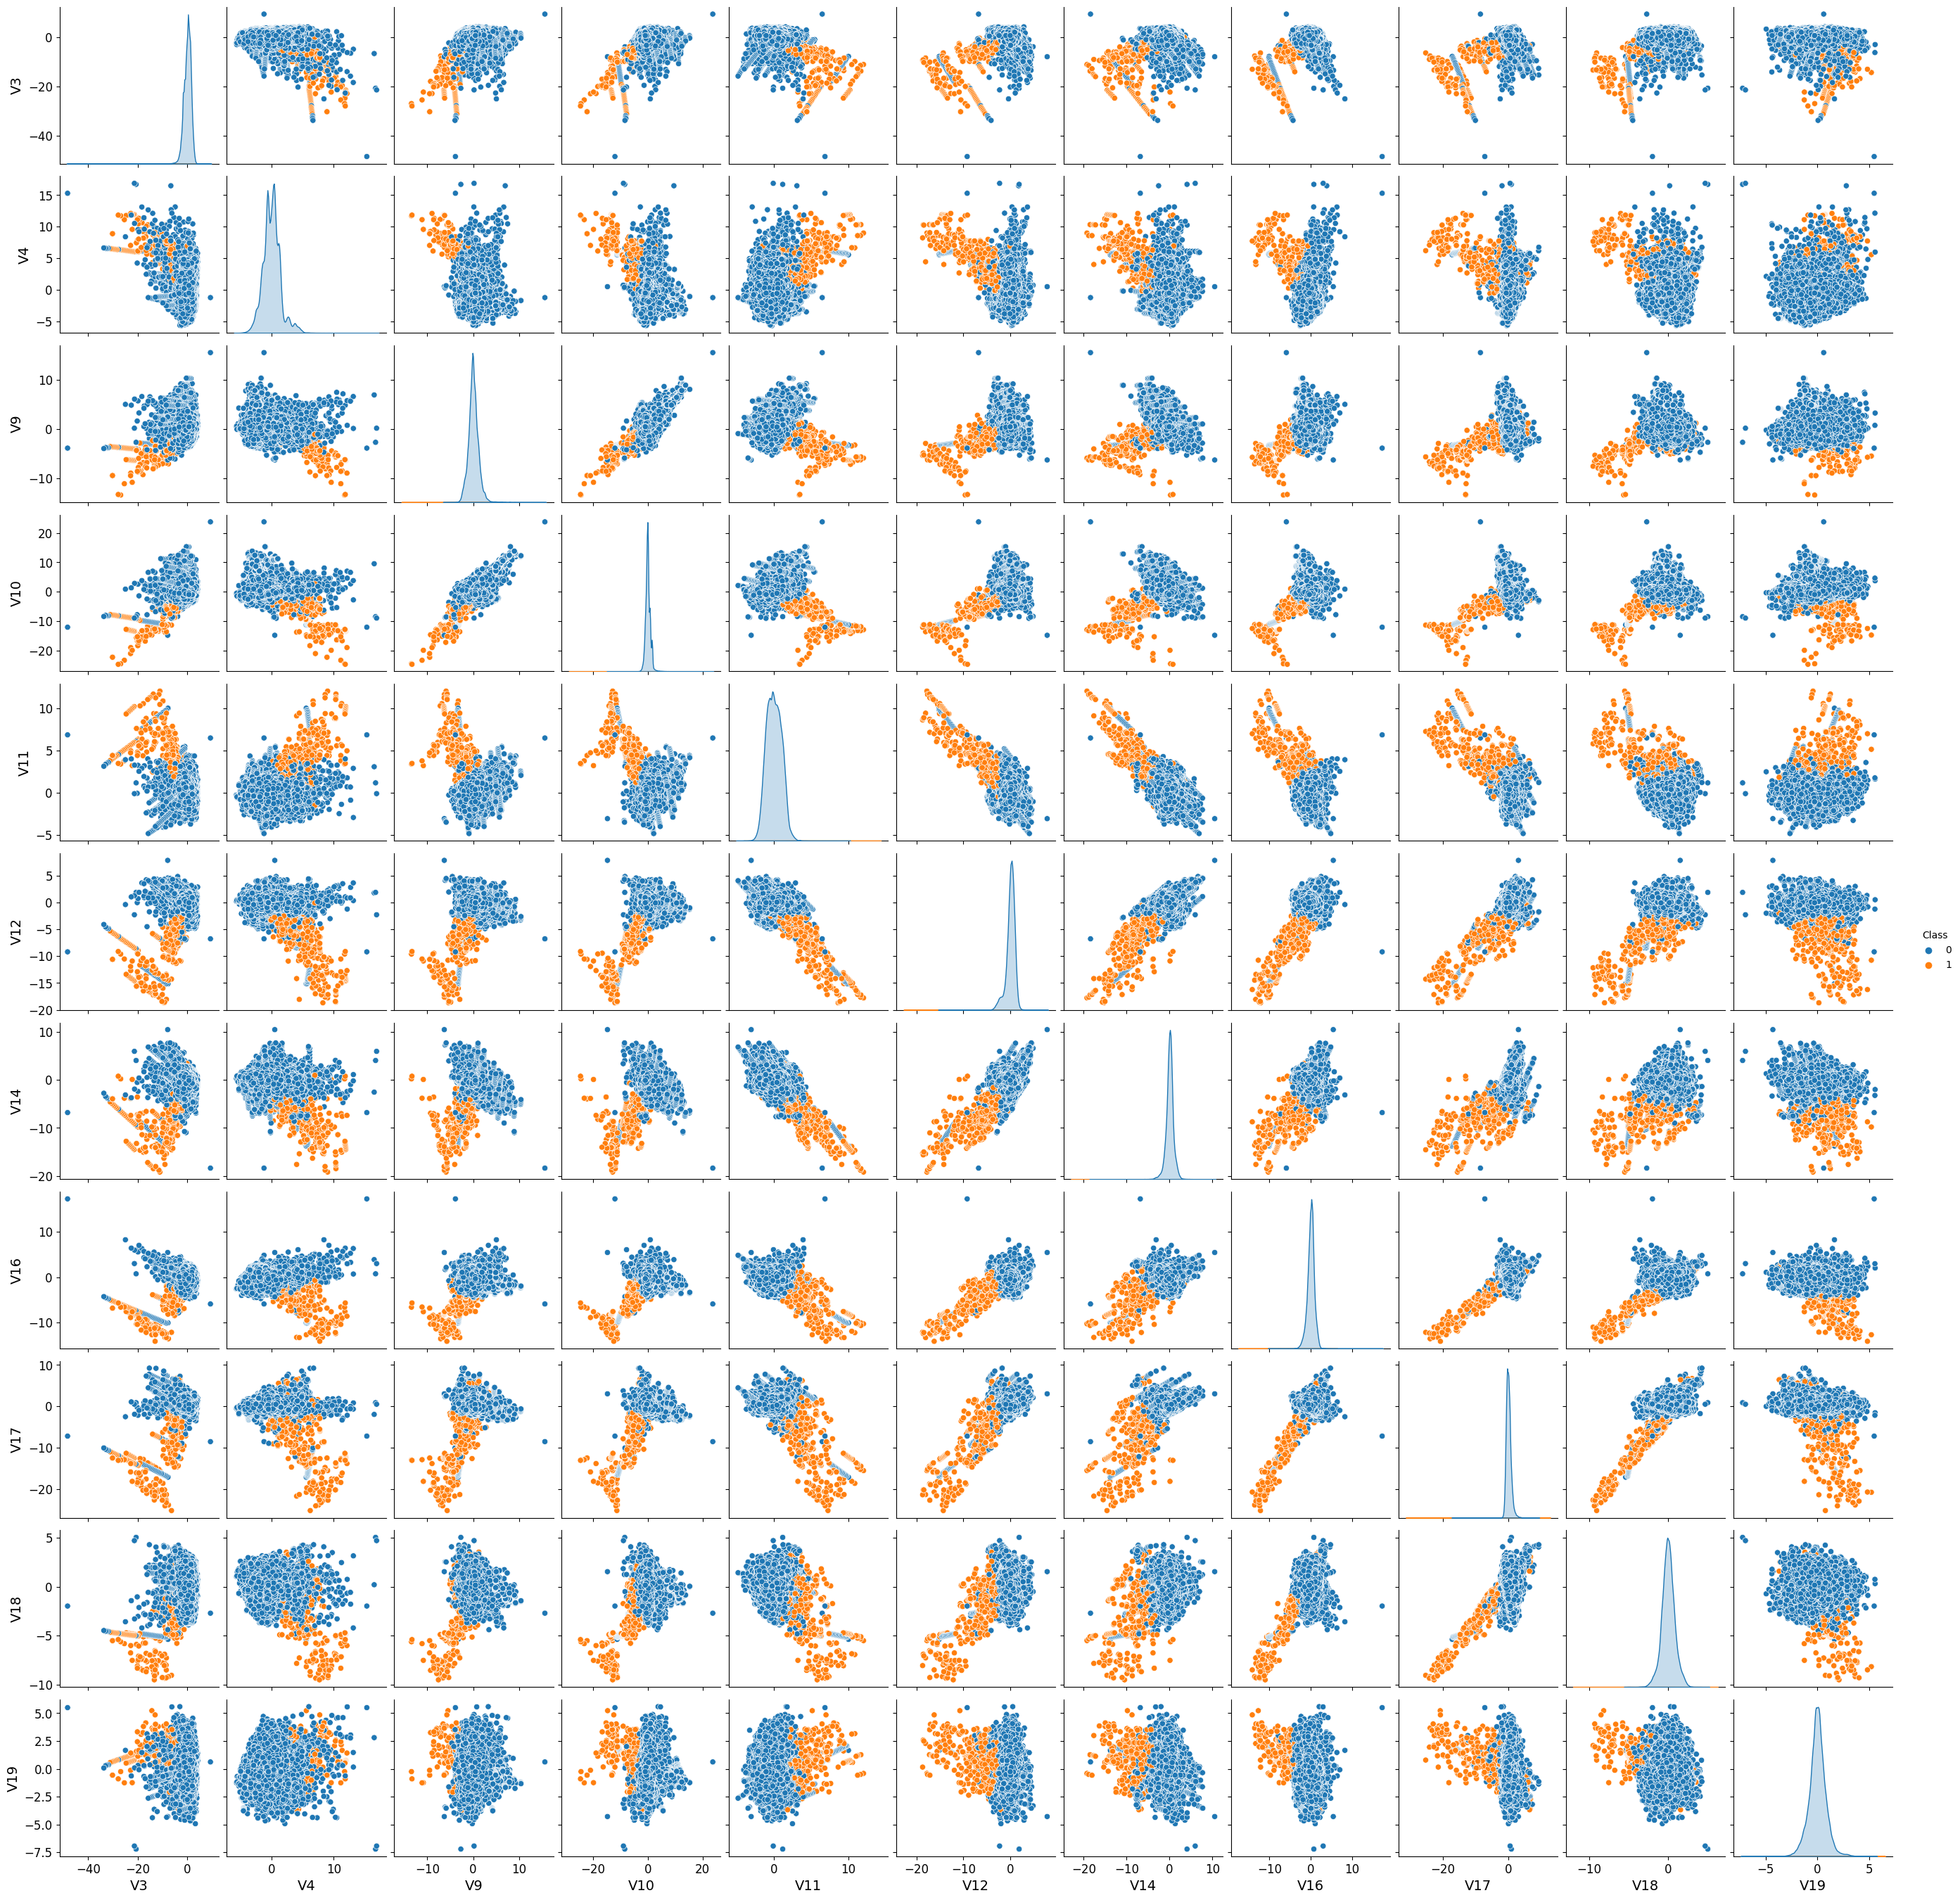

In [ ]:
#Visualization to understand the relationship between features and also data pattern using pair plot from seaborn
g = sns.pairplot(cc_ds,hue="Class",diag_kind='kde')

There is not much insight form the pairplot except that most of features have clear separation for fraud records versus genuine records. We can notice that distribution of fraud records is quite different compared to genuine records in the diagonal kde plots.

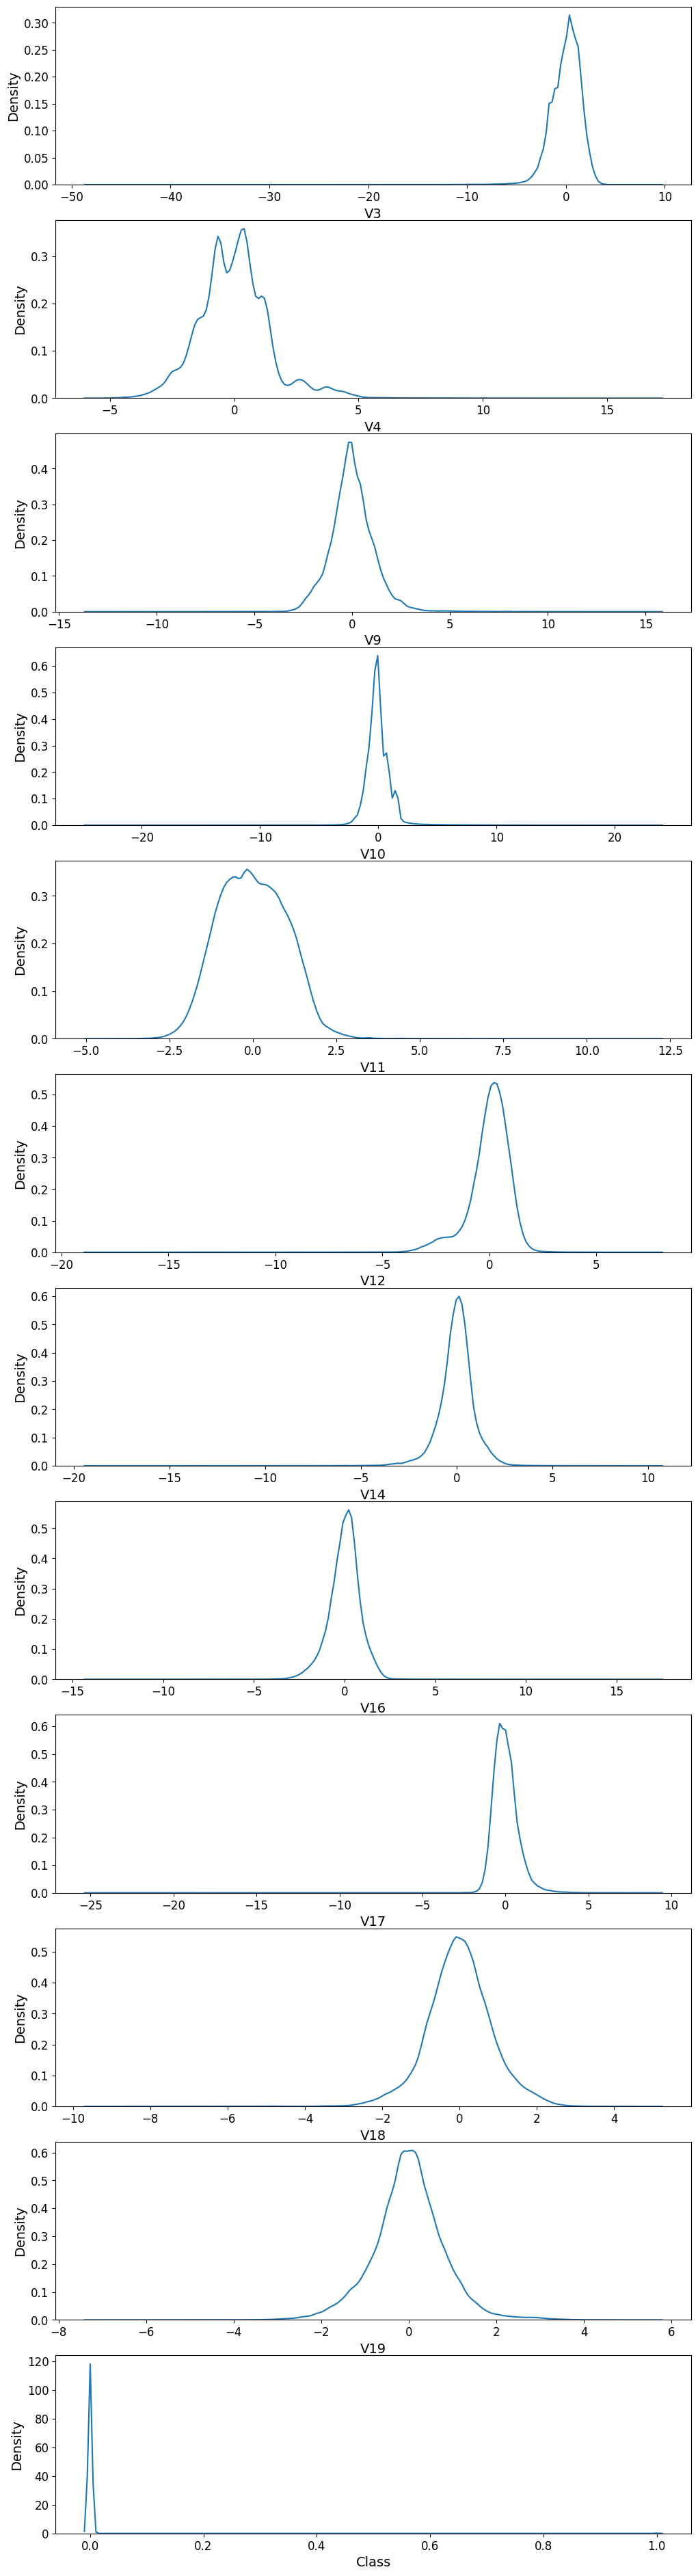

In [ ]:
#Data Visualization for checking the normal distribution
v_features = cc_ds.columns
plt.figure(figsize=(12,12*4))
gs = gridspec.GridSpec(12,1)

for i, col in enumerate(v_features):
    ax = plt.subplot(gs[i])
    sns.kdeplot(cc_ds[col])
plt.show()

All the features looks to be normally distributed. So we can train the Multivariate Guassian Distribution algorthm using the original features.

In [ ]:
def estimateGaussian(data):
    mu = np.mean(data,axis=0)
    sigma = np.cov(data.T)
    return mu,sigma

In [ ]:
def MultivariateGaussianDistribution(data,mu,sigma):
    p = multivariate_normal.pdf(data, mean=mu, cov=sigma)
    p_transformed = np.power(p,1/100) #transformed the probability scores by p^1/100 since the values are very low (up to e-150)
    return p_transformed

In [ ]:
legit_data = cc_ds[cc_ds['Class']==0]
fraud_data = cc_ds[cc_ds['Class']==1]

In [ ]:
#Split Genuine records into train & test - 60:40 ratio
genuine_train,genuine_test = train_test_split(legit_data,test_size=0.4,random_state=0)
print(genuine_train.shape)
print(genuine_test.shape)

(170589, 12)
(113726, 12)


In [ ]:
#Split 40% of Genuine Test records into Cross Validation & Test again (50:50 ratio)
genuine_cv,genuine_test = train_test_split(genuine_test,test_size=0.5,random_state=0)
print(genuine_cv.shape)
print(genuine_test.shape)

(56863, 12)
(56863, 12)


In [ ]:
#Split Fraud records into Cross Validation & Test (50:50 ratio)
fraud_cv,fraud_test = train_test_split(fraud_data,test_size=0.5,random_state=0)

In [ ]:
#Drop Y-label from Train data
train_data = genuine_train.drop(labels='Class',axis=1)
print(train_data.shape)

(170589, 11)


In [ ]:
#Cross validation data
cv_data = pd.concat([genuine_cv,fraud_cv])
cv_data_y = cv_data['Class']
cv_data.drop(labels='Class',axis=1,inplace=True)
print(cv_data.shape)

(57109, 11)


In [ ]:
#Test data
test_data = pd.concat([genuine_test,fraud_test])
test_data_y = test_data['Class']
test_data.drop(labels='Class',axis=1,inplace=True)
print(test_data.shape)

(57109, 11)


In [ ]:
#Find out the parameters Mu and Covariance for passing to the probability density function
mu,sigma = estimateGaussian(train_data)

In [ ]:
#Multivariate Gaussian distribution - This calculates the probability for each record.
p_train = MultivariateGaussianDistribution(train_data,mu,sigma)
print(p_train.mean())
print(p_train.std())
print(p_train.max())
print(p_train.min())

0.8619974422026009
0.04613876261260607
0.90419793993761
0.0


In [ ]:
#Calculate the probabilities for cross validation and test records by passing the mean and co-variance matrix derived from train data
p_cv = MultivariateGaussianDistribution(cv_data,mu,sigma)
p_test = MultivariateGaussianDistribution(test_data,mu,sigma)

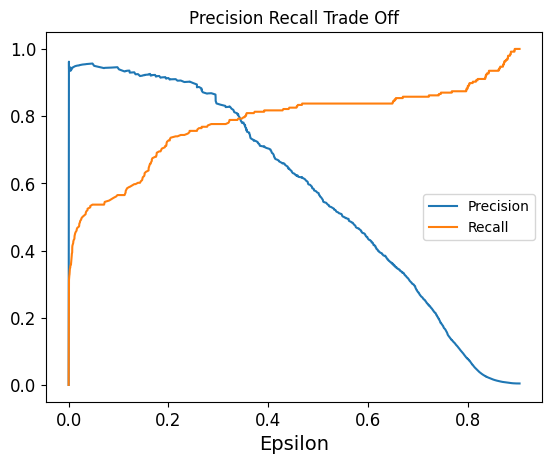

Best F1 Score 0.823009
Best Precision Score 0.902913
Best Recall Score 0.756098
Best Epsilon Score 0.24251123651264186


In [ ]:
#Let us use cross validation to find the best threshold where the F1 -score is high
SelectThresholdByCV_Anomaly(p_cv,cv_data_y)

In [ ]:
#CV data - Predictions
pred_cv= (p_cv < 0.2425112365126434)
Print_Accuracy_Scores(cv_data_y, pred_cv)

F1 Score:  0.8211920529801324
Precision Score:  0.8985507246376812
Recall Score:  0.7560975609756098


Text(0.5, 1.0, 'Normalized Confusion Matrix - Cross Validation')

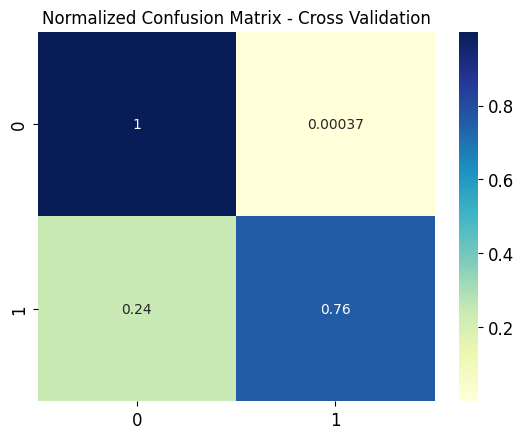

In [ ]:
#Confusion matrix on CV
cnf_matrix = confusion_matrix(cv_data_y,pred_cv)
row_sum = cnf_matrix.sum(axis=1,keepdims=True)
cnf_matrix_norm =cnf_matrix / row_sum
sns.heatmap(cnf_matrix_norm,cmap='YlGnBu',annot=True)
plt.title("Normalized Confusion Matrix - Cross Validation")

Please notice that False negatives are around 24%. We tried to reduce this false negatives thus improve recall score by increasing the epsilon. We are successful in bringing the recall above 80%, however precsion is going down to 70% pretty quickly. Hence we decided to keep epsilon with best f1-score, i.e: 0.2425

In [ ]:
#Test data - Check the F1-score by using the best threshold from cross validation
predictions = (p_test < 0.2425112365126434)
Print_Accuracy_Scores(test_data_y, predictions)

F1 Score:  0.8292682926829268
Precision Score:  0.9121951219512195
Recall Score:  0.7601626016260162


Text(0.5, 1.0, 'Normalized Confusion Matrix - Test data')

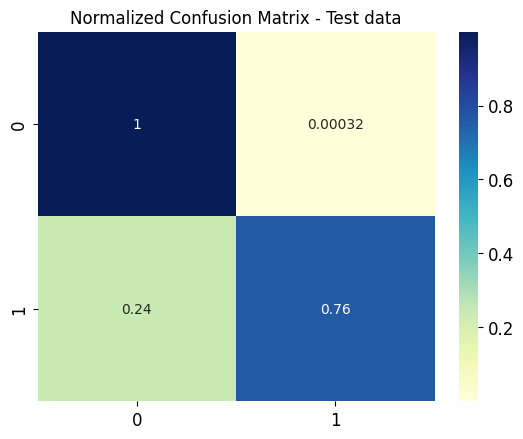

In [ ]:
cnf_matrix = confusion_matrix(test_data_y, predictions)
row_sum = cnf_matrix.sum(axis=1,keepdims=True)
cnf_matrix_norm =cnf_matrix / row_sum
sns.heatmap(cnf_matrix_norm,cmap='YlGnBu',annot=True)
plt.title("Normalized Confusion Matrix - Test data")

Conclusion: Anomaly detection algorthm has provided decent results with F1-score of 83. We can improve recall & thus f1-score further by deriving new features based on the business knowledge. Since the features are transformed from PCA output, we couldn't understand their purpose and do feature engineering here.